In [16]:
#Problem 2: Learning to implement Neural Network
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
from keras.layers import Dense, Flatten

In [17]:
# Defining path to the image folder
path_train = '/content/drive/MyDrive/train'
path_val = '/content/drive/MyDrive/val'

In [18]:
# Set the path to the folder containing the train folder
data_train = path_train

# Set the size of the image
train_img_size = (32, 32)

# Creating empty lists for labels and images
images_List = []
labels_List = []

# Looping over each folder 
for lab in range(10):
  path_folder = os.path.join(data_train, 'train', str(lab))
  # Looping over each image in the folder
  for f in os.listdir(path_folder):
    path_file = os.path.join(path_folder, f)
    if path_file.endswith(('.tiff','.bmp')):
      #Loading and Resizing the image 
      image = cv2.imread(path_file, cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image, train_img_size)
      #Append the image and label to the lists 
      images_List.append(image)
      labels_List.append(lab)
 

In [19]:
# Converting the list to Numpy arrays
images_List = np.array(images_List)
labels_List = np.array(labels_List)

# Saving the numpy format arrays
np.save('train_x.npy', images_List)
np.save('train_y.npy', labels_List)

In [21]:
# Set the path to the folder containing the val folder
data_val = path_val

# Set the image size
val_img_size = (32, 32)

# Create empty lists for the images and labels
val_images = []
val_labels = []

# Loop over each folder from '0' to '9'
for lab in range(10):
  path_folder = os.path.join(data_val, 'val', str(lab))
  
  # Loop over each image in the folder
  for file in os.listdir(path_folder): 
    path_file = os.path.join(path_folder, file)
    if path_file.endswith(('.tiff','.bmp')):
      # Load the image and resize it to the desired size
      image = cv2.imread(path_file, cv2.IMREAD_GRAYSCALE)
      image = cv2.resize(image, val_img_size)
      # Append the image and label to the lists
      val_images.append(image)
      val_labels.append(lab)

# Converting the list to Nmpy arrays
val_images = np.array(val_images)
val_labels = np.array(val_labels)

#Saving the numpy format arrays
np.save('test_x.npy', val_images)
np.save('test_y.npy', val_labels)

In [22]:
# Loading the dataset
train_x = np.load('train_x.npy')
train_y = np.load('train_y.npy')
test_x = np.load('test_x.npy')
test_y = np.load('test_y.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


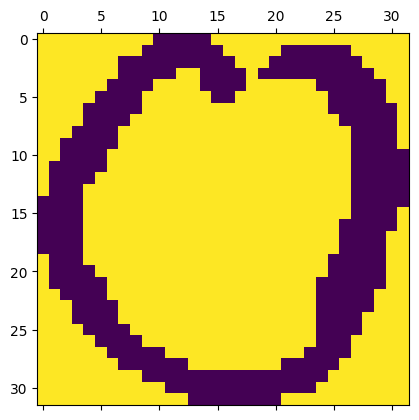

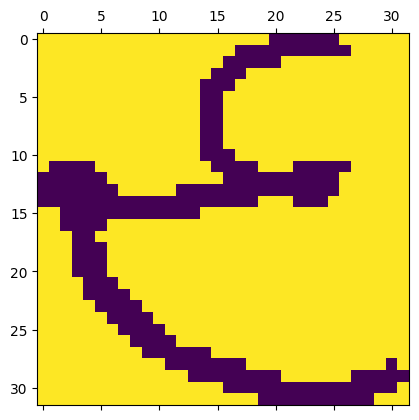

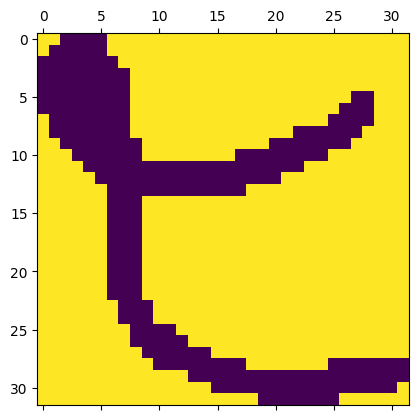

In [23]:
#Testing if the images are loaded correctly 

print(len(train_x))
print(len(test_x))
train_x[0].shape
train_x[0]
plt.matshow(train_x[0])
plt.matshow(train_x[999])
print(train_x.shape)
print(test_x.shape)
train_y
test_y
plt.matshow(test_x[150])

In [24]:
# Changing the dataset from 2D to 1D
# creating a simple nn and create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10 
# activation function is sigmoid
model = keras.Sequential([
 keras.layers.Flatten(),keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid') 
])

# compile the nn
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Consider 10 iterations and train the model
model.fit(train_x, train_y,epochs= 10, validation_data=(test_x, test_y))



Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 120.3846 - accuracy: 0.4390 - val_loss: 49.8161 - val_accuracy: 0.6067
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 21.9267 - accuracy: 0.8110 - val_loss: 33.8904 - val_accuracy: 0.7472
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 13.4567 - accuracy: 0.8710 - val_loss: 37.5691 - val_accuracy: 0.7697
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 8.6954 - accuracy: 0.9140 - val_loss: 22.3715 - val_accuracy: 0.8483
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 4.0959 - accuracy: 0.9400 - val_loss: 18.8043 - val_accuracy: 0.8876
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 4.1972 - accuracy: 0.9480 - val_loss: 17.2087 - val_accuracy: 0.8820
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 3.8002 - accuracy: 0.9410 - val_loss: 15.5986 - val_accuracy: 0.8989
Epoch 8/1

In [25]:
# Dividing the dataset by 255 and scaling & checking the accuracy
train_x_scaled = train_x/255
test_x_scaled = test_x/255
model.fit(train_x_scaled, train_y,epochs= 10, validation_data=(test_x_scaled, test_y))

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 0.7600 - accuracy: 0.9650 - val_loss: 1.0004 - val_accuracy: 0.8539
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7485 - accuracy: 0.9730 - val_loss: 0.9758 - val_accuracy: 0.8764
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7290 - accuracy: 0.9810 - val_loss: 0.9547 - val_accuracy: 0.8989
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7139 - accuracy: 0.9900 - val_loss: 0.9384 - val_accuracy: 0.9045
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.9920 - val_loss: 0.9260 - val_accuracy: 0.8989
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.9960 - val_loss: 0.9154 - val_accuracy: 0.9101
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.9950 - val_loss: 0.9071 - val_accuracy: 0.9101
Epoch 8/10
32/32 [==

In [26]:
# Test dataset
model.evaluate(test_x_scaled,test_y)

6/6 [==============================] - 0s 3ms/step - loss: 0.8848 - accuracy: 0.9101


[0.8848311901092529, 0.9101123809814453]

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


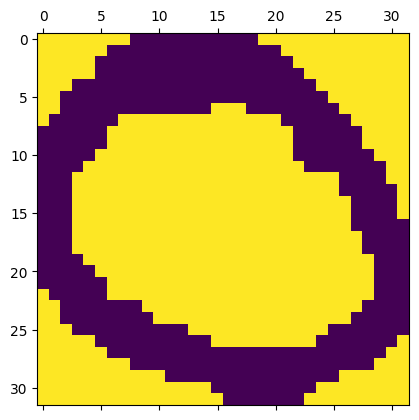

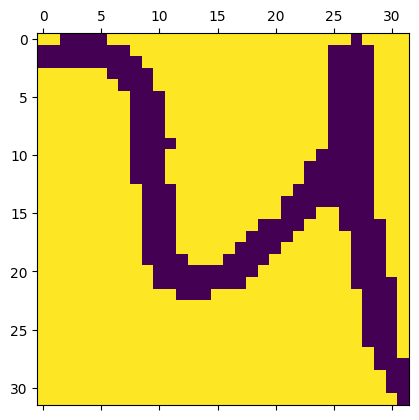

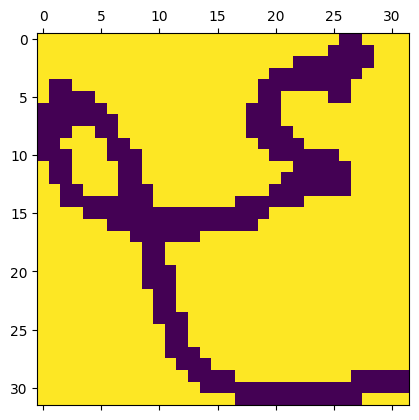

In [27]:
# Predicting 1st image 
plt.matshow(test_x[0])
y_pred = model.predict(test_x_scaled)
y_pred[0]

# Showing the 10 max values
print('Predicted Value is ',np.argmax(y_pred[0]))

# testing different values 
plt.matshow(test_x[88])
print('Predicted Value is ',np.argmax(y_pred[88]))

plt.matshow(test_x[177])
print('Predicted Value is ',np.argmax(y_pred[177]))


In [28]:
# Building the confusion matrix to see the prediction
pred_y_label=[np.argmax(i) for i in y_pred]
print(pred_y_label, len(pred_y_label))

conf_matrix = tf.math.confusion_matrix(labels=test_y, predictions=pred_y_label)
conf_matrix

[0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 7, 1, 1, 7, 1, 1, 7, 7, 1, 7, 1, 1, 1, 7, 9, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 10,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 0,  0, 15,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  1,  0, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  0, 17,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

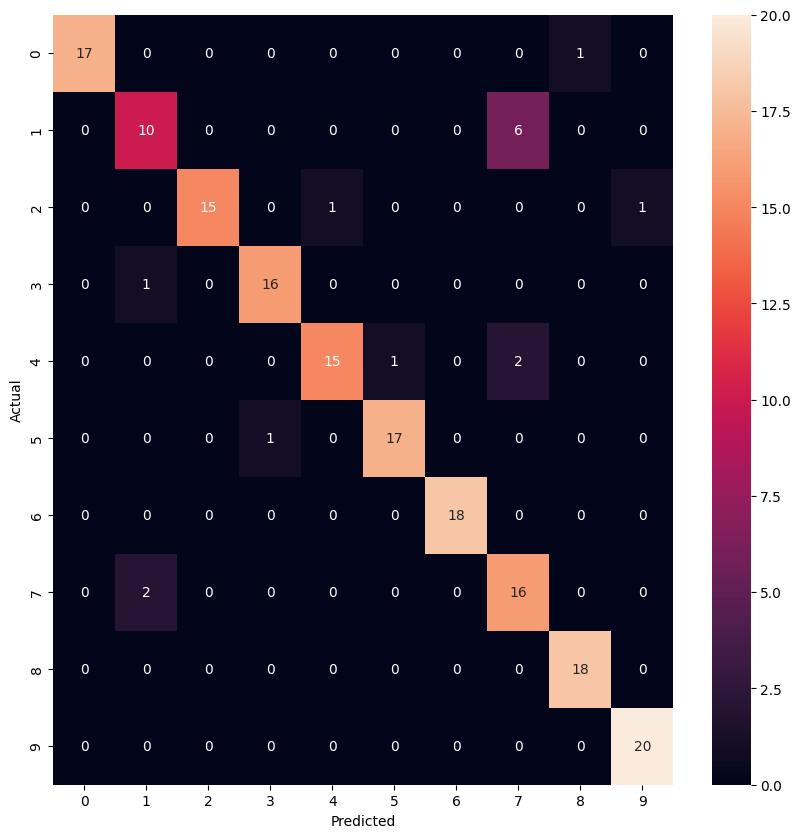

In [29]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [30]:
# 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9) and 2nd Dense layer,the input is 10 neurons from above layers output
# So we add more layers for accuracy

model_2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compile the nn
model_2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
history = model_2.fit(train_x_scaled, train_y,epochs= 10, validation_data=(test_x_scaled, test_y))


Epoch 1/10
32/32 [==============================] - 1s 26ms/step - loss: 0.8354 - accuracy: 0.7640 - val_loss: 0.4642 - val_accuracy: 0.8258
Epoch 2/10
32/32 [==============================] - 0s 15ms/step - loss: 0.1689 - accuracy: 0.9480 - val_loss: 0.2357 - val_accuracy: 0.9438
Epoch 3/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0969 - accuracy: 0.9710 - val_loss: 0.2860 - val_accuracy: 0.9045
Epoch 4/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0565 - accuracy: 0.9840 - val_loss: 0.1922 - val_accuracy: 0.9326
Epoch 5/10
32/32 [==============================] - 1s 28ms/step - loss: 0.0295 - accuracy: 0.9960 - val_loss: 0.2025 - val_accuracy: 0.9213
Epoch 6/10
32/32 [==============================] - 2s 63ms/step - loss: 0.0305 - accuracy: 0.9920 - val_loss: 0.2002 - val_accuracy: 0.9382
Epoch 7/10
32/32 [==============================] - 2s 57ms/step - loss: 0.0248 - accuracy: 0.9940 - val_loss: 0.2010 - val_accuracy: 0.9551
Epoch 8/10
32

In [31]:
# Testing dataset on modified model
model_2.evaluate(test_x_scaled,test_y)


6/6 [==============================] - 0s 7ms/step - loss: 0.2162 - accuracy: 0.9494


[0.21616224944591522, 0.949438214302063]

In [32]:
# Earlier we got 0.9213483333587646 now we got 0.9606741666793823 accuracy
# redo the confusion matrix 
# build confusion matrix to see how our prediction looks like
# convert to concrete values
pred_y = model_2.predict(test_x_scaled)
pred_y[0]
pred_y_labels=[np.argmax(i) for i in pred_y]
print(pred_y_labels, len(pred_y_labels))
conf_matrix = tf.math.confusion_matrix(labels=test_y, predictions=pred_y_labels)
conf_matrix

6/6 [==============================] - 0s 6ms/step
[0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 7, 1, 1, 7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 5, 2, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

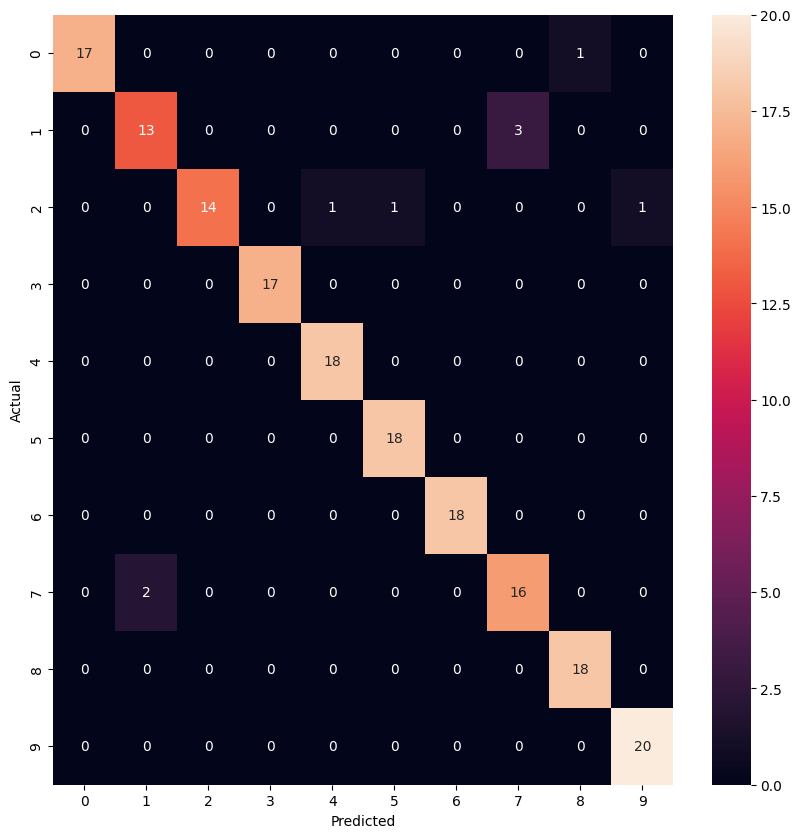

In [33]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 2ms/step - loss: 13.4982 - accuracy: 0.9101
Test accuracy: 0.9101123809814453


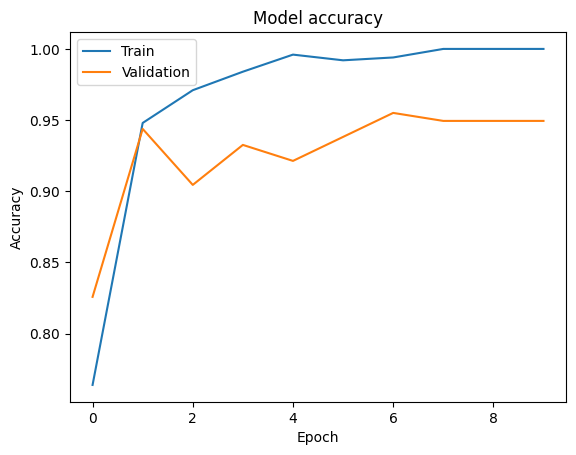

In [34]:
# The updated model has less no. of errors 

# Evaluate the model
loss_test, acc_test = model.evaluate(test_x, test_y)
print('Test accuracy:', acc_test)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
